<a href="https://colab.research.google.com/github/VirangParekh/Automated-EQ/blob/main/GFG_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import pandas as pd
from tensorflow.python.keras import regularizers

In [3]:
vocab_size = 10000
embedding_dim = 64 #size of embeddig vector
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 5300 

In [4]:
df=pd.read_csv('/content/drive/MyDrive/BE Project/Dataset/isear.csv',header=None)
# The isear.csv contains rows with value 'No response'
# We need to remove such rows
df.drop(df[df[1] == '[ No response.]'].index, inplace = True)
df

,0,1
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
7647,anger,Two years back someone invited me to be the tu...
7648,sadness,I had taken the responsibility to do something...
7649,disgust,I was at home and I heard a loud sound of spit...
7650,shame,I did not do the homework that the teacher had...


In [5]:
# from sklearn.preprocessing import LabelBinarizer
# print(df[0].unique())
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# df[0] = enc.fit_transform(np.array(df[0]).reshape(-1,1)).toarray()
# df[0].unique()

In [6]:
sentences = df[1].tolist()
# labels = df[0].tolist()
# Hot Encodig
from sklearn.preprocessing import LabelBinarizer
labels = LabelBinarizer().fit_transform(df[0])
labels

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
# testing_labels = tf.keras.utils.to_categorical(testing_labels, num_classes=7)

In [59]:
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels \
        = train_test_split(sentences, labels, test_size=0.2, random_state=32)

In [61]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

#saving the tokens in the variable
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [62]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [81]:
from keras.layers import Activation, Dense, Dropout

# model = tf.keras.Sequential([                            
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=100,embeddings_regularizer=regularizers.l2(0.001)))
model.add(Bidirectional(LSTM(200,kernel_regularizer=regularizers.l2(0.001)))) #,kernel_regularizer=regularizers.l2(0.1)
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax')) #,kernel_regularizer=regularizers.l2(0.1)
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 300)               301200    
_________________________________________________________________
dropout_27 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 2107      
Total params: 1,303,307
Trainable params: 1,303,307
Non-trainable params: 0
_________________________________________________________________


In [85]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

 94/190 [=============>................] - ETA: 4s - loss: 25.1508 - accuracy: 0.1749

KeyboardInterrupt: ignored

In [45]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

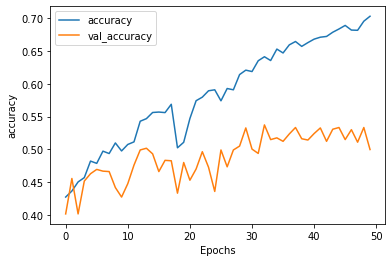

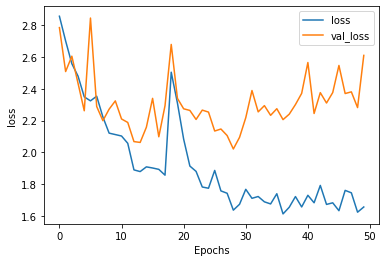

In [84]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')